# Sheet 2

Markus    Müllenmeister 7321662

Alexander Specht 7325506

## Exercise 1

### a&b:

<IPython.core.display.Javascript object>


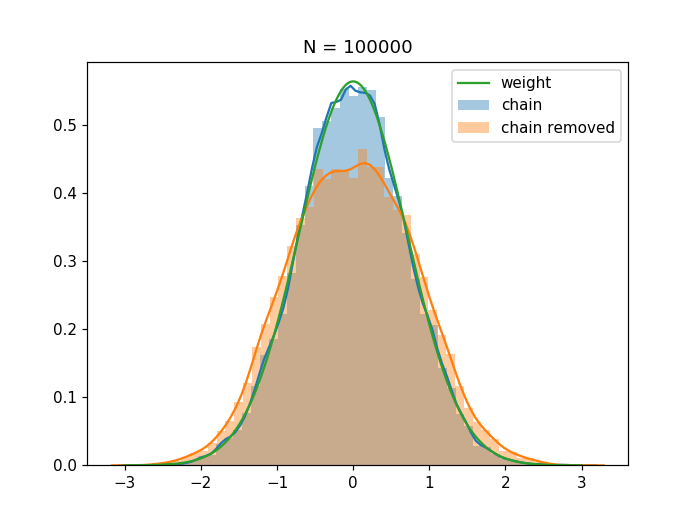

C:\Users\Markus\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [4]:
%matplotlib notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('default')

def w(x):
    """
    weighting function
    """
    w = np.exp(-x**2)/np.sqrt(np.pi)
    return w


def next_chain_link(x, y):
    """
    checks whether y is accepted as next chain link
    """
    gamma = np.random.rand()
    alpha = w(y)/w(x)
    return alpha >= gamma


def metro_alg(N):
    """
    metropolis algorithm that creates markov chain of length N.
    """

    chain = np.zeros(N) # start with x_0 = 0
    chain_removed = np.array([0])
    j = 0
    for i in range(N-1):
        y = (np.random.rand()-0.5)*10
        if next_chain_link(chain[i], y):
            chain[i + 1] = y
        else:
            chain[i + 1] = chain[i]

        if next_chain_link(chain_removed[j], y):
            chain_removed = np.append(chain_removed, y) # append creates new array, does not change array argument
            j += 1
    return chain, chain_removed


#plot
N = 100000
chain, chain_removed = metro_alg(N)
x_values = np.linspace(-3, 3, N) #x values to plot w(x)
sns.distplot(chain, label="chain")
sns.distplot(chain_removed, label="chain removed")
plt.plot(x_values, w(x_values), label="weight")
plt.title("N = " + str(N))
plt.legend()
plt.show()

## Exercise 2

### a:

<IPython.core.display.Javascript object>


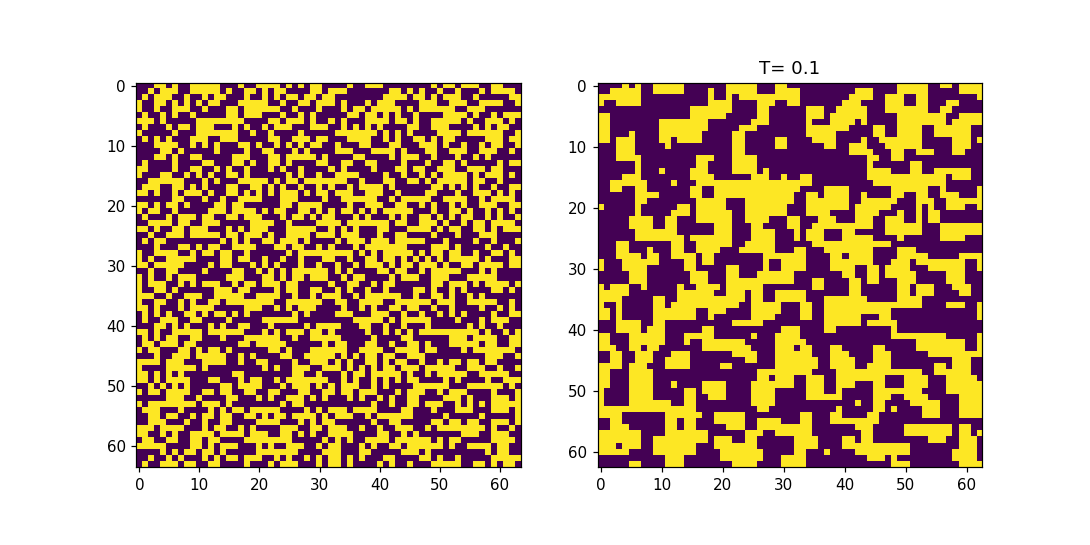

<IPython.core.display.Javascript object>


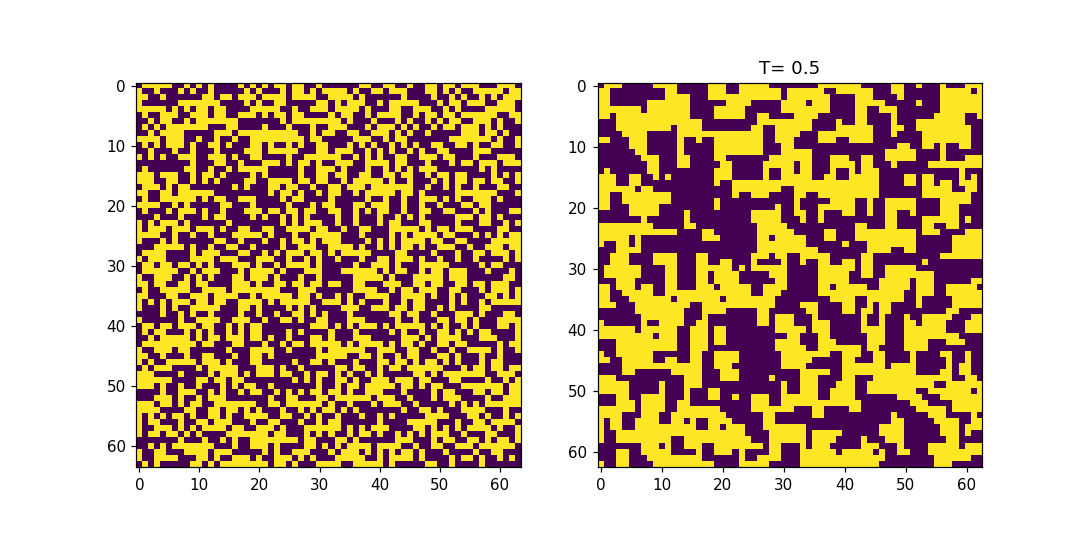

<IPython.core.display.Javascript object>


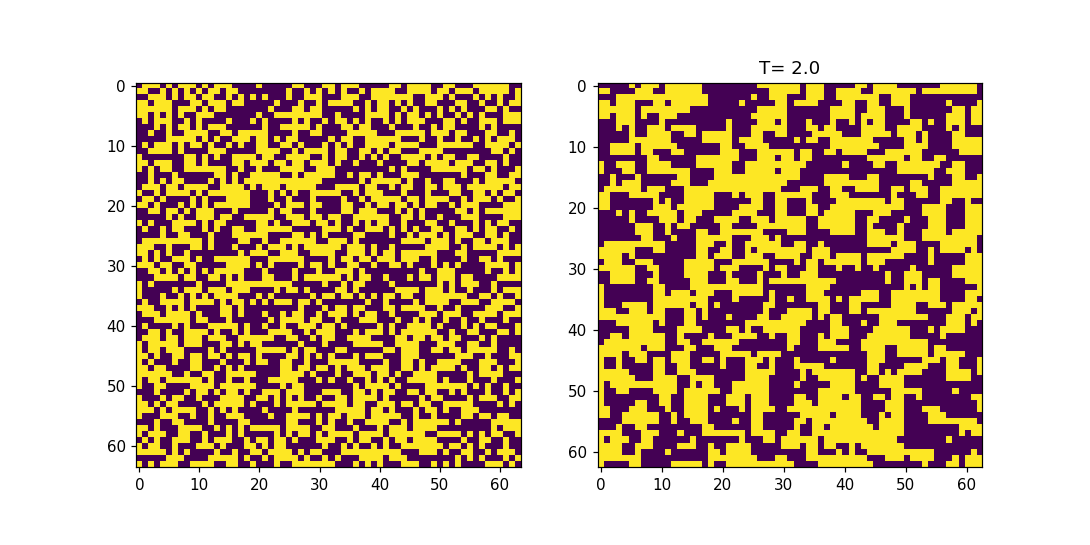

<IPython.core.display.Javascript object>


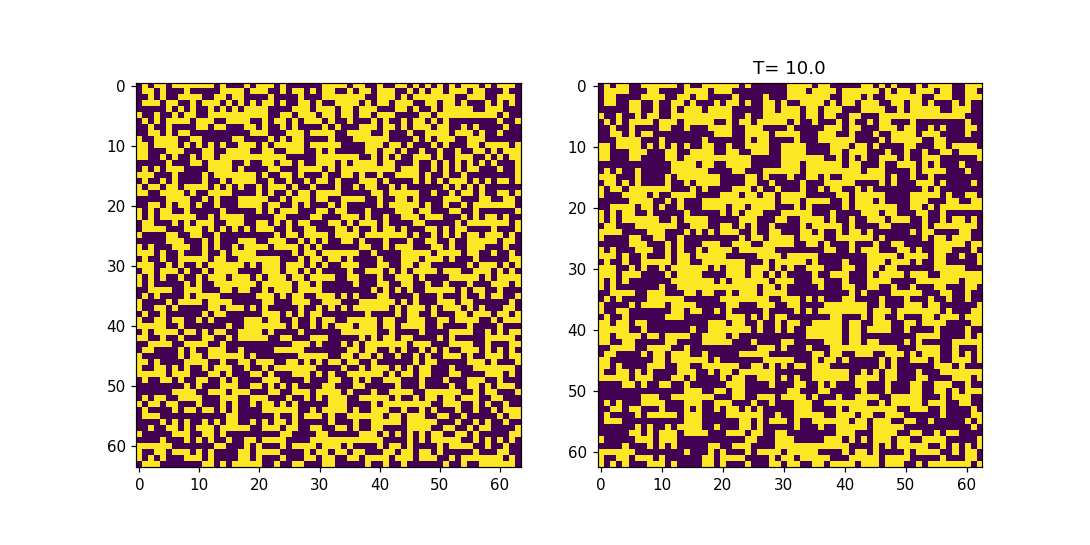

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.constants import k as kB
kB=1 #overwrite to show the effect for the specified values

def Ham(conf, h=0):
    """
    returns value of specified Hamiltonian, currently unused
    """
    
    #setup of periodic boundary conditions via copying
    op= np.empty([conf.shape[0]+2, conf.shape[1]+2])
    #body
    op[1:conf.shape[0]+1,1:conf.shape[1]+1]= conf
    #edges
    op[1:conf.shape[0]+1, 0]= conf[:, conf.shape[1]-1]
    op[1:conf.shape[0]+1, op.shape[1]-1]= conf[:, 0]
    op[0, 1:conf.shape[1]+1]= conf[conf.shape[0]-1, :]
    op[op.shape[0]-1, 1:conf.shape[1]+1]= conf[0,:]
    #corners
    op[0,0]= conf[conf.shape[0]-1,conf.shape[1]-1]
    op[op.shape[0]-1, op.shape[1]-1]= conf[0,0]
    op[0, op.shape[1]-1]= conf[conf.shape[0]-1,0]
    op[op.shape[0]-1, 0]= conf[0,conf.shape[1]-1]
    if h==0:
        E=0.0
        for i in range(1, op.shape[0]-1):
            for j in range(1, op.shape[1]-1):
                E+=op[i,j]*op[i+1,j]+op[i,j]*op[i,j+1]
        return E
    return 0.0

def betterMarkovChainIsing(conf, T, steps):
    """
    does steps iterations of the Spin-flip Markov algorithm 
    uses the fact that the hamiltonian only cares about nearest neighbours 
        to reduce needed computation by the number of cells in conf
    on the spin configuration conf 
    with temperature T
    returns final configuration 
    always uses the predefined Hamiltonian
    """
    bet= 1/(kB*T)
    #setup of periodic boundary conditions via copying
    confExt= np.empty([conf.shape[0]+2, conf.shape[1]+2])
    #body
    confExt[1:confExt.shape[0]-1,1:confExt.shape[1]-1]= conf
    #edges
    confExt[1:confExt.shape[0]-1, 0]= confExt[1:confExt.shape[0]-1, confExt.shape[1]-2]  
    confExt[1:confExt.shape[0]-1, confExt.shape[1]-1]=confExt[1:confExt.shape[0]-1, 1] 
    confExt[0, 1:confExt.shape[1]-1]=confExt[confExt.shape[0]-2, 1:confExt.shape[1]-1] 
    confExt[confExt.shape[0]-1, 1:confExt.shape[1]-1]=confExt[1, 1:confExt.shape[1]-1] 
    #corners
    confExt[0,0]=confExt[confExt.shape[0]-2,confExt.shape[1]-2]
    confExt[confExt.shape[0]-1, confExt.shape[1]-1]=confExt[1,1]
    confExt[0, confExt.shape[1]-1]=confExt[confExt.shape[0]-2,1]
    confExt[confExt.shape[0]-1, 0]=confExt[1,confExt.shape[1]-2]
    for s in range(0,steps):
        x,y=np.random.randint(1,confExt.shape[0]-1),np.random.randint(1,confExt.shape[1]-1)    
        DE=-2*confExt[x,y]*(confExt[x-1,y]+confExt[x,y-1]+confExt[x+1,y]+confExt[x,y+1])
        #print(np.exp(-bet*DE))
        if DE>0 and np.exp(-bet*(DE))<np.random.rand():
            #accept
            confExt[x,y]*=-1
            if x==1 or x== confExt.shape[0]-2 or y==1 or y==confExt.shape[1]-2:
                #update periodic boundary
                #edges
                confExt[1:confExt.shape[0]-1, 0]= confExt[1:confExt.shape[0]-1, confExt.shape[1]-2]  
                confExt[1:confExt.shape[0]-1, confExt.shape[1]-1]=confExt[1:confExt.shape[0]-1, 1] 
                confExt[0, 1:confExt.shape[1]-1]=confExt[confExt.shape[0]-2, 1:confExt.shape[1]-1] 
                confExt[confExt.shape[0]-1, 1:confExt.shape[1]-1]=confExt[1, 1:confExt.shape[1]-1] 
                #corners
                confExt[0,0]=confExt[confExt.shape[0]-2,confExt.shape[1]-2]
                confExt[confExt.shape[0]-1, confExt.shape[1]-1]=confExt[1,1]
                confExt[0, confExt.shape[1]-1]=confExt[confExt.shape[0]-2,1]
                confExt[confExt.shape[0]-1, 0]=confExt[1,confExt.shape[1]-2]
    return confExt[1:confExt.shape[0]-2,1:confExt.shape[1]-2]

N= 64
p= 0.5
temp=[0.1, 0.5, 2.0, 10.0]
z=0
for T in temp:
    plt.figure(z, figsize= (10,5))
    plt.subplot(1, 2, 1)
    grid= (np.random.rand(N,N)<p)-0.5
    plt.imshow(grid)
    plt.subplot(1, 2, 2)
    grid=betterMarkovChainIsing(grid, T, 10000)
    plt.imshow(grid)
    plt.title("T= "+str(T))
    z+=1

### b:

<IPython.core.display.Javascript object>


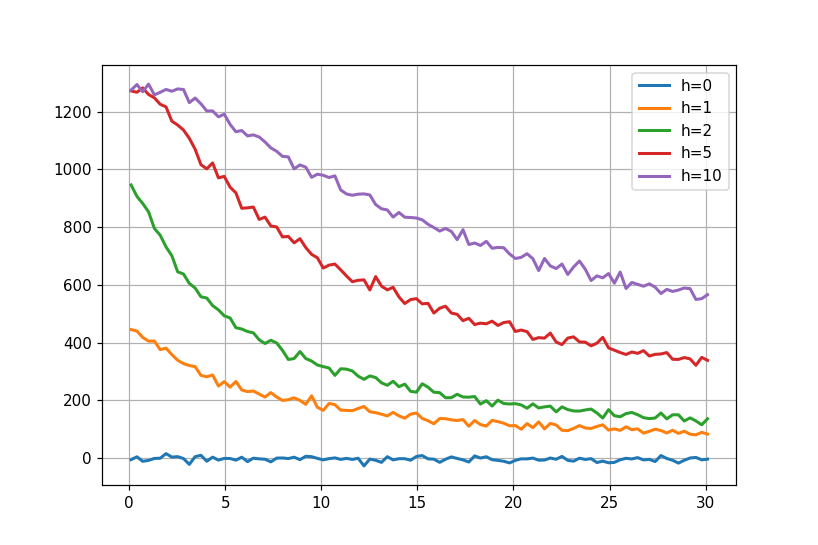

In [6]:
%matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.constants import k as kB
kB=1

mpl.style.use('default')

def MfromMCI(conf, T, h, steps):
    """
    todo:this
    does steps iterations of the Spin-flip Markov algorithm 
    uses the fact that the hamiltonian only cares about nearest neighbours 
        to reduce needed computation by the number of cells in conf
    on the spin configuration conf 
    with temperature T
    returns final configuration 
    always uses the predefined Hamiltonian
    """
    bet= 1/(kB*T)
    #setup of periodic boundary conditions via copying
    confExt= np.empty([conf.shape[0]+2, conf.shape[1]+2])
    #body
    confExt[1:confExt.shape[0]-1,1:confExt.shape[1]-1]= conf
    #edges
    confExt[1:confExt.shape[0]-1, 0]= confExt[1:confExt.shape[0]-1, confExt.shape[1]-2]  
    confExt[1:confExt.shape[0]-1, confExt.shape[1]-1]=confExt[1:confExt.shape[0]-1, 1] 
    confExt[0, 1:confExt.shape[1]-1]=confExt[confExt.shape[0]-2, 1:confExt.shape[1]-1] 
    confExt[confExt.shape[0]-1, 1:confExt.shape[1]-1]=confExt[1, 1:confExt.shape[1]-1] 
    #corners
    confExt[0,0]=confExt[confExt.shape[0]-2,confExt.shape[1]-2]
    confExt[confExt.shape[0]-1, confExt.shape[1]-1]=confExt[1,1]
    confExt[0, confExt.shape[1]-1]=confExt[confExt.shape[0]-2,1]
    confExt[confExt.shape[0]-1, 0]=confExt[1,confExt.shape[1]-2]
    M=0.0
    for s in range(0,steps):
        x,y=np.random.randint(1,confExt.shape[0]-1),np.random.randint(1,confExt.shape[1]-1)    
        DE=2*confExt[x,y]*(confExt[x-1,y]+confExt[x,y-1]+confExt[x+1,y]+confExt[x,y+1])+2*h*confExt[x,y]    
        if DE>0 and np.exp(-bet*(DE))<np.random.rand():
            #accept
            confExt[x,y]*=-1
            #strange if clause for more efficient evaluation
            if not (not x==1 and not x==confExt.shape[0]-2 and not y==1 and not y==confExt.shape[1]-2):   
                #update periodic boundary
                #edges
                confExt[1:confExt.shape[0]-1, 0]= confExt[1:confExt.shape[0]-1, confExt.shape[1]-2]  
                confExt[1:confExt.shape[0]-1, confExt.shape[1]-1]=confExt[1:confExt.shape[0]-1, 1] 
                confExt[0, 1:confExt.shape[1]-1]=confExt[confExt.shape[0]-2, 1:confExt.shape[1]-1] 
                confExt[confExt.shape[0]-1, 1:confExt.shape[1]-1]=confExt[1, 1:confExt.shape[1]-1] 
                #corners
                confExt[0,0]=confExt[confExt.shape[0]-2,confExt.shape[1]-2]
                confExt[confExt.shape[0]-1, confExt.shape[1]-1]=confExt[1,1]
                confExt[0, confExt.shape[1]-1]=confExt[confExt.shape[0]-2,1]
                confExt[confExt.shape[0]-1, 0]=confExt[1,confExt.shape[1]-2]
        k=np.sum(confExt[1:confExt.shape[0]-1,1:confExt.shape[1]-1])
        M+=k
    return M/steps

N=64
for t in np.linspace(0.1,5,50):
    MfromMCI((np.random.rand(N,N)<0.5)-0.5, t, 1, 10000)

"""#"""
N=64
T= np.linspace(0.1,30.1,100)
hVals= [0,1,2,5,10]
plt.figure(0, figsize=[7.5,5])
for h in hVals:
    lsg= np.empty(100)
    start= (np.random.rand(N,N)<0.5)-0.5
    for t in range(0,100):
        lsg[t]=MfromMCI(start, T[t], h, 10000)
    plt.plot(T,-lsg, label= "h="+str(h), lw=2)
plt.grid()
plt.legend()
plt.show()
#"""

## Exercise 3

### a:
The formula for the orbit is:  
$$
\vec{r}_i(t)= \begin{pmatrix}
\sin{(2\pi t+ \phi_i)}\\
\cos{(2\pi t+ \phi_i)}
\end{pmatrix} \qquad 0\leq t < 1
$$



$$\phi_i= \frac{2\pi(i-1)}{N}$$


<IPython.core.display.Javascript object>


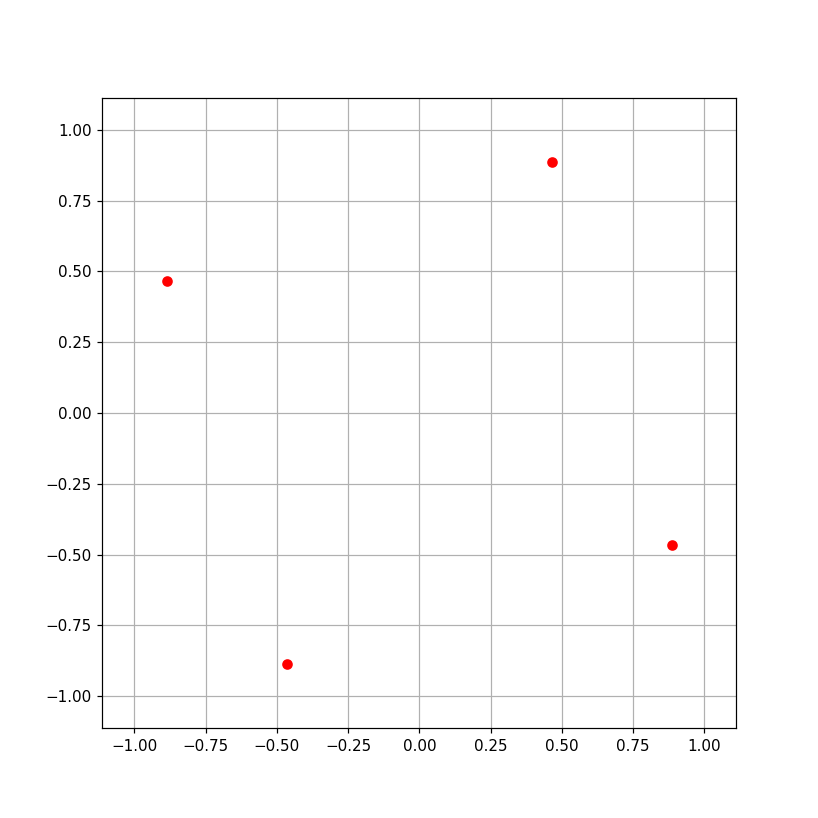

In [7]:
%matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

mpl.style.use('default')

def phi(i,N=4):
    return 2*np.pi*(i-1)/N

def r(i, t, N=4):
    return [np.sin(2*np.pi*t+phi(i,N)), np.cos(2*np.pi*t+phi(i,N))]

N=4
T= np.linspace(0,1,300)
arr= np.empty([N, T.shape[0], 2])
for t in range(0,T.shape[0]):
    for i in range(1,N+1):
        arr[i-1, t]= r(i, T[t], N)
    
#animation: number of frames must be specified beforehand due to limitations with jupyter notebook
fig = plt.figure(0, figsize=[7.5, 7.5]) #set up figure to be animated
ims = [] #list in which the animator objects will be stored
for t in range(T.shape[0]):
    im = plt.scatter(arr[:,t,0], arr[:,t,1], c="red", animated=True) #convert current state of g to animator
    plt.grid()
    ims.append([im]) #append animator to list
#create and show animation
plt.grid()
ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True, repeat=True)
plt.show()

### b:
The gravitational force on a particle is generally
$$\vec{F}=G\sum_i^N{\frac{m_iM(\vec{r_i}-\vec{r})}{||\vec{r_i}-\vec{r}||^3}}$$

From previously we know: 
$$\vec{r_i}(t)= R\begin{pmatrix} \sin{(2\pi t +\phi_i)}\\\cos{(2\pi t +\phi_i)}\end{pmatrix}$$

At $t=0$ this simplifys to 
$$\vec{r_i}(0)=R\begin{pmatrix}\sin{\phi_i}\\ \cos{\phi_i}\end{pmatrix} \qquad i=1 \Rightarrow \begin{pmatrix}0\\1\end{pmatrix}$$

The difference of the vectors which determine the force on particle 1 can be written as
$$\sum_{i=2}^N\vec{r_i}-\vec{r_1}=\sum_{i=2}^N R\begin{pmatrix}\sin{(\phi_i)}\\ \cos{(\phi_i)}-1\end{pmatrix}$$
And the magnitude of the vector difference is
$$||\vec{r_i}-\vec{r_1}||= R\sqrt{(\sin{\phi_i})^2+(\cos{\phi_i}-1)^2}
\\=R\sqrt{\cos^2\phi_i + \sin^2 \phi_i + 1 -2\cos{\phi_i}}
= R\sqrt{2-2\cos\phi_i}= 2R\sin{(\phi_i/2)}$$

And since the arrangement is always mirror-symmetric with respect to the axis of $\vec{r_i}$, the total force is always facing radially inwards, in the case of $\vec{r_1}$ along the x-axis:

$$\vec{F_1}= \frac{1}{2} \sum_{i=2}^N -G \frac{m^2}{2R^2} \frac{1}{\sin{(\phi_i/2)}}\begin{pmatrix}0\\1\end{pmatrix}$$
with
$$m_i=m, \quad \phi_i=(i-1)\frac{2\pi}{N}$$


In [8]:
def F_x1(N):
    s=0.0
    for j in range(2,N+1):
        s+=1/(np.sin((j-1)*np.pi/N))
    return s/4
print(F_x1(2))

0.25


### c:

The gravitational force acts as a centripetal force because of the circular orbit:

$$F_z= \frac{mv^2}{R}=\frac{Gm^2}{4R^2}\sum_{i=2}^N{\frac{1}{\sin{((i-1)\pi /N)}}}$$
$$\Rightarrow v^2 = \frac{Gm}{4R}\sum_{i=2}^N{\frac{1}{\sin{((i-1)\pi /N)}}}$$

### d&e:
The general formula for the force between bodys in a gravitational system is: 
$$\vec{F_{i,j}}=m_i \cdot \ddot{\vec{r_i}}= G\sum_{j\neq i}^N{\frac{m_i m_j (\vec{r_j}-\vec{r_i})}{||\vec{r_j}-\vec{r_i}||^3}}$$

Divide by $m_j$ on both sides and you receive the equation for the accelleration. Following that, one can formulate the seperated system of equation to solve for the many body problem:  

$$
\vec{u}(t)
=
\begin{pmatrix}
u_1(t)\\
\vdots \\
u_{N}(t) \\
u_{N+1}(t) \\
\vdots \\
u_{2N}(t)
\end{pmatrix}
= 
\begin{pmatrix}
\vec{r_1}(t) \\
\vdots \\
\vec{r_N}(t) \\
\dot{\vec{r_1}}(t) \\
\vdots \\
\dot{\vec{r_N}}(t) \\
\end{pmatrix}
\qquad \Rightarrow
\dot{\vec{u}}(t) = 
\begin{pmatrix}
\dot{\vec{r_1}}(t) \\
\vdots \\
\dot{\vec{r_N}}(t) \\
\ddot{\vec{r_1}}(t) \\
\vdots \\
\ddot{\vec{r_N}}(t) \\
\end{pmatrix}
=
\begin{pmatrix}
u_{N+1}(t) \\
\vdots \\
u_{2N}(t) \\
g_1(\vec{u},t) \\
\vdots \\
g_N(\vec{u},t) \\
\end{pmatrix}
$$
With
$$g_i(\vec{u}, t)= 
G \sum_{j\neq i}^N{m_j \frac{\vec{u_j}(t)-\vec{u_i}(t)}{||\vec{u_j}(t)-\vec{u_i}(t)||^3}}$$

Traceback (most recent call last):
  File "C:\Users\Markus\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\Markus\AppData\Roaming\Python\Python37\site-packages\matplotlib\animation.py", line 1462, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


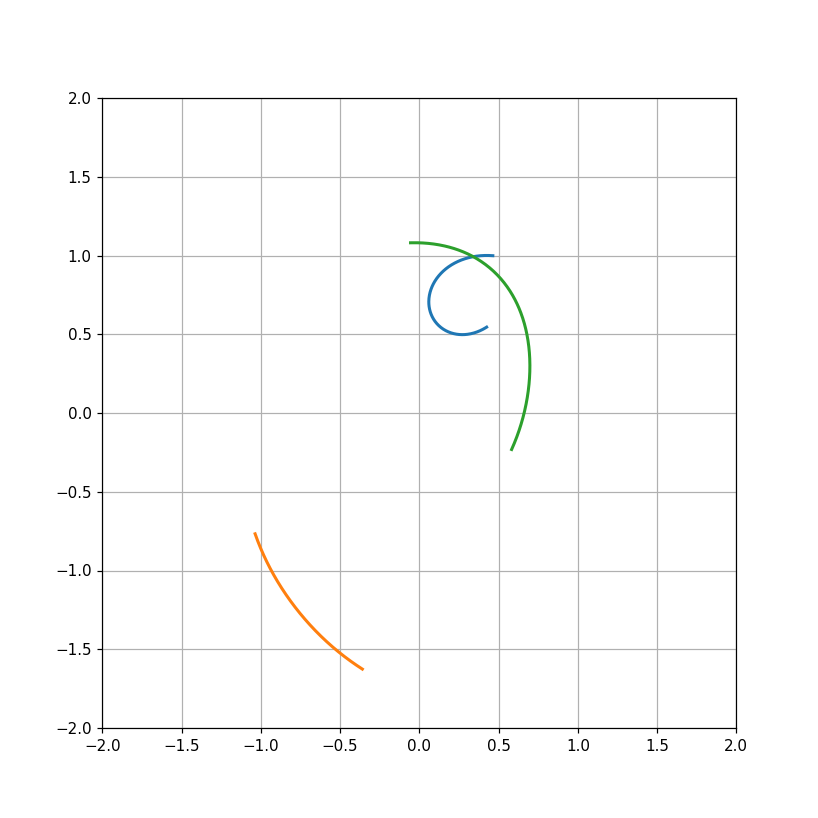

In [9]:
%matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

mpl.style.use('default')

N = 3  # number of bodys, gets distributed on unit circle with correct initial velocities
G = 1  # gravitational constant
Mgen = 1  # Mass for all bodys
times = [0, 8 * np.pi, 5000]  # start, end and number of steps for time
animated = True  # if the solution should be shown as an animation or a static image
taillength = times[2] / (6 * N)  # tail length in the animation in frames
part = 'e'  # which exercise Part should be shown. Insert 'd' or 'e'. Defaults to d


def posVec(i, N):
    """
    returns the position vector of the i'th of N equally spaced bodys on the unit circle
    """
    return [np.cos(2 * np.pi * (i) / N), np.sin(2 * np.pi * (i) / N)]


def velVec(v, N, m, G):
    """
    returns the velocity vector for a circular orbit of N bodys at position v for the constant m mass and G gravitational constant
    """
    s = 0
    for i in range(1, N):
        s += 1 / np.sin(i * np.pi / N)
    return np.sqrt(G * m * s / (4)) * np.array([-v[1], v[0]])


def g(u, t, args):
    """
    Describes the system of equation to be solved in accordance with RK4solve
    """
    G = args[0]  # gravitational constant
    m = args[1]  # masses of bodys
    d = u.shape[0]  # dimension of array to be solved
    ret = np.copy(u)  # return array
    ret[0:np.floor(d / 2).astype(int)] = u[
                                         np.floor(d / 2).astype(int):d]  # first half is simply second half of previous
    for i in range(0, np.floor(d / 2).astype(int)):
        s = 0
        for j in range(0, np.floor(d / 2).astype(int)):
            if i == j:
                s += 0
            else:
                s += m[j] * (u[j] - u[i]) / (np.power(np.linalg.norm(u[j] - u[i]), 3))
        ret[i + np.floor(d / 2).astype(int)] = G * s  # next half is function g
    return ret


def RK4solve(func, u, start, dt, tStart, FuncParams=None):
    """
    Uses fourth order Runge-Kutta to solve the DE func in Array u.
    @param
        func: Function to be solved. Must have parameters:
            uArray (current t-column of u)
            t (current time)
            aParam (same as FuncParams)
        u: NumPy Array in which the function is solved. must have 2 dimensions:
            first one for the steps in time, i.e. u_1(X),
            second (and following) one(s) for the partial differential equations u_1, u_2, etc.
        start: List with initial conditions of u, i.e. [u_1(0), u_2(0), ...]
        t: current time for the solution of the DE's
        tStart: time for initial conditions start
        FuncParams: for additional arguments required for func
    @return None, edits u in-place
    """
    t = tStart
    u[0] = start  # set up starting values
    for i in range(1, u.shape[0]):  # go through every (time) step for func
        t += dt
        c1 = dt * func(u[i - 1], t, FuncParams)  # calculate first increment
        c2 = dt * func(u[i - 1] + 0.5 * c1, t, FuncParams)  # calculate second increment
        c3 = dt * func(u[i - 1] + 0.5 * c2, t, FuncParams)  # calculate third increment
        c4 = dt * func(u[i - 1] + c3, t, FuncParams)  # calculate fourth increment
        u[i] = u[i - 1] + (c1 + 2.0 * c2 + 2.0 * c3 + c4) / 6.0  # calculate next value of solution
    return None


m = np.zeros(N) + Mgen  # masses of bodies
start = np.empty([2 * N, 2])  # initialize the starting configuration with N*2 columns of 2-vectors
dt = (times[1] - times[0]) / times[2]  # calculate time steps between configurations
U = np.empty([times[2], N * 2,
              2])  # initialize array to be solved, same as start, but with the first extra dimension for each configuration
for i in range(0, N):
    start[i] = posVec(i, N)
for i in range(N, 2 * N):
    start[i] = velVec(start[i - N], N, m[i - N], G)
params = [G, m]
if part == 'e':
    start[0, 0] += 0.01
RK4solve(g, U, start, dt, times[0], params)

if not animated:
    fig = plt.figure(0, figsize=[7.5,7.5])
    ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
    for l in range(0, N):
        plt.plot(U[:, l, 0], U[:, l, 1], lw=2)
    plt.grid()
    plt.show()
else:
    fig = plt.figure(1, figsize=[7.5,7.5])
    ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
    lines = [plt.plot([], [], lw=2)[0] for _ in range(N)]
    xData = [[] for _ in range(N)]
    yData = [[] for _ in range(N)]


    def init():
        # init lines
        for line in lines:
            line.set_data([], [])
        return lines


    def animate(i):
        # animate lines
        for j, line in enumerate(lines):
            if i == 0:
                xData[j] = []
                yData[j] = []
            if i > taillength:
                xData[j] = xData[j][1:]
                yData[j] = yData[j][1:]
            xData[j].append(U[i, j, 0])
            yData[j].append(U[i, j, 1])
            line.set_data(xData[j], yData[j])
        return lines


    anim_running = True


    def onClick(event):
        global anim_running
        if anim_running:
            anim.event_source.stop()
            anim_running = False
        else:
            anim.event_source.start()
            anim_running = True


    fig.canvas.mpl_connect('button_press_event', onClick)

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=times[2], interval=10, blit=True)
    plt.grid()
    plt.show()
